#Machine Learning and FinTech 2024/25
##Homework 0930 reference answer
By TA, Chan Nok Hang

#CH12 Question 10
In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data

##(a)
Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.\
*Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.*

In [ ]:
import numpy as np
# Set the random seed for reproducibility
np.random.seed(0)

# Set the number of observations per class
n_per_class = 20

# Set the number of variables
n_variables = 50

# Set the mean shifts for each class
mean_shifts = [0, 2, 4]

# Initialize an empty array to store the data
data = np.empty((0, n_variables))

# Generate data for each class
for mean_shift in mean_shifts:
    # Generate data for each class with a normal distribution
    class_data = np.random.normal(loc=mean_shift, scale=1, size=(n_per_class, n_variables))
    # Append the class data to the overall data array
    data = np.vstack((data, class_data))

# To verify the shape of the data:
print(data.shape)


(60, 50)


##(b)
Perform PCA on the 60 observations and plot the frst two principal component score vectors. Use a diferent color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some separation in the frst two principal component score vectors.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data' contains the simulated data
pca = PCA(n_components=2)  # Reduce data to 2 principal components
pc_data = pca.fit_transform(data)
score=pca.transform(data)

In [ ]:
pca.components_.shape

(2, 50)

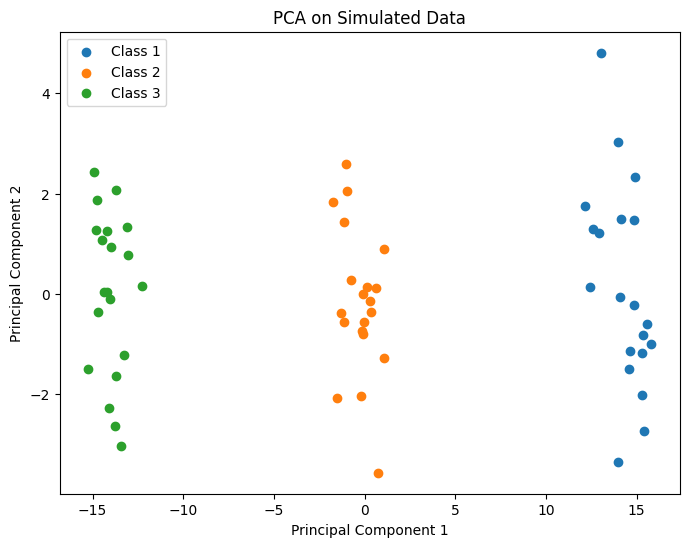

In [ ]:
# Create a scatter plot with different colors for each class
plt.figure(figsize=(8, 6))

for class_num in range(3):
    class_indices = range(class_num * n_per_class, (class_num + 1) * n_per_class)
    plt.scatter(
        score[class_indices, 0],
        score[class_indices, 1],
        label=f'Class {class_num + 1}',
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Simulated Data')
plt.legend()
plt.show()


##(c)
Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?\
Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
cluster_labels = kmeans.labels_

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'True Class': np.repeat(np.arange(3), n_per_class),
                              'Cluster Label': cluster_labels})

# Use crosstab to compare the true class labels and clustering labels
crosstab = pd.crosstab(comparison_df['True Class'], comparison_df['Cluster Label'])

# Display the crosstab to see the correspondence between clusters and true classes
print(crosstab)


Cluster Label   0   1   2
True Class               
0               0  20   0
1               0   0  20
2              20   0   0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1. The clustering model assigned each true class exclusively to a single cluster, meaning there is a one-to-one correspondence between true classes and clusters (though the labels of clusters may not match the true class labels).
2. The K-means clustering was able to perfectly separate the data into three distinct clusters that correspond exactly to the true classes, just with different labeling.

In summary, the K-means clustering did a perfect job in distinguishing the three true classes. The cluster labels (0, 1, 2) are different from the true class labels, but the separation between classes is exact.

##(d)
Perform K-means clustering with K = 2. Describe your results.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
cluster_labels = kmeans.labels_

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'True Class': np.repeat(np.arange(3), n_per_class),
                              'Cluster Label': cluster_labels})

# Use crosstab to compare the true class labels and clustering labels
crosstab = pd.crosstab(comparison_df['True Class'], comparison_df['Cluster Label'])

# Display the crosstab to see the correspondence between clusters and true classes
print(crosstab)


Cluster Label   0   1
True Class           
0               0  20
1              20   0
2              20   0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Interpretation:

Cluster 0 combines True Class 1 and True Class 2, indicating that K-means clustering with K = 2 groups these two classes together.

Cluster 1 corresponds to True Class 0.

Based on this interpretation, it's evident that K-means clustering with K = 2 does not effectively separate True Class 0 from the combination of True Class 1 and True Class 2. This suggests that K-means with K = 2 is not an optimal choice for capturing the true class structure in the data, and alternative clustering methods or a higher number of clusters may be more suitable.

##(e)
Now perform K-means clustering with K = 4, and describe your
results.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Perform K-means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
cluster_labels = kmeans.labels_

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'True Class': np.repeat(np.arange(3), n_per_class),
                              'Cluster Label': cluster_labels})

# Use crosstab to compare the true class labels and clustering labels
crosstab = pd.crosstab(comparison_df['True Class'], comparison_df['Cluster Label'])

# Display the crosstab to see the correspondence between clusters and true classes
print(crosstab)

Cluster Label   0   1   2   3
True Class                   
0              10   0  10   0
1               0   0   0  20
2               0  20   0   0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- K-means successfully differentiated True Class 1 and True Class 2, assigning them each to their own distinct clusters (Cluster 3 and Cluster 1, respectively).
- However, K-means struggled with True Class 0, dividing it into two separate clusters (Cluster 0 and Cluster 2). This may indicate that the data points for True Class 0 exhibit characteristics that make them hard to cluster together, possibly overlapping with features of the other clusters or being less distinct overall.

This suggests that the clustering algorithm had difficulty with True Class 0 but performed well in identifying True Class 1 and True Class 2 as separate groups.

##(f)
Now perform K-means clustering with K = 3 on the frst two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the frst column is the frst principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Perform K-means clustering with K=3 on the 2D data
kmeans = KMeans(n_clusters=3, random_state=0).fit(pc_data)
cluster_labels = kmeans.labels_

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'True Class': np.repeat(np.arange(3), n_per_class),
                              'Cluster Label': cluster_labels})

# Use crosstab to compare the true class labels and clustering labels
crosstab = pd.crosstab(comparison_df['True Class'], comparison_df['Cluster Label'])

# Display the crosstab to see the correspondence between clusters and true classes
print(crosstab)


Cluster Label   0   1   2
True Class               
0               0  20   0
1               0   0  20
2              20   0   0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- The clustering result shows a perfect one-to-one correspondence between true classes and clusters. Each true class is perfectly assigned to a single cluster, even though the cluster labels (0, 1, 2) are different from the true class labels (0, 1, 2).
- Despite the different cluster labels, K-means was able to fully separate the three true classes without any misclassifications.

This result indicates that the K-means algorithm worked perfectly in identifying the three distinct groups in the data.

##(g)
Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance and scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform K-means clustering with K=3 on the scaled data
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)
cluster_labels = kmeans.labels_

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'True Class': np.repeat(np.arange(3), n_per_class),
                              'Cluster Label': cluster_labels})

# Use crosstab to compare the true class labels and clustering labels
crosstab = pd.crosstab(comparison_df['True Class'], comparison_df['Cluster Label'])

# Display the crosstab to see the correspondence between clusters and true classes
print(crosstab)


Cluster Label   0   1   2
True Class               
0               0  20   0
1               0   0  20
2              20   0   0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1.Scaling Variables:\
In part (b), we are performed PCA on the raw data without scaling the variables. In part (g), we applied the StandardScaler() to scale each variable to have a standard deviation of one before performing K-means clustering.

2.Comparison of Results:
Part (b) Results: In part (b), without scaling the variables, we are performed PCA directly on the raw data and then applied K-means clustering. The clustering results were based on the original data with different variable scales.

Part (g) Results: In part (g), we scaled the data using StandardScaler() to ensure that all variables have a standard deviation of one. We then performed K-means clustering on the scaled data.

3.Explanation:
Scaling the variables is essential for K-means clustering as it is a distance-based algorithm. Standardizing the data helps ensure that each variable contributes equally to the clustering process, as variables with different scales can disproportionately influence the results.

The results in part (g) should be more robust and less influenced by variable scales compared to those in part (b). When variables are on similar scales, K-means clustering can more effectively group data points based on their overall patterns rather than being dominated by variables with larger scales.

4.Comparison:
The results in part (g) are likely to be more reliable and consistent in terms of clustering the data compared to those in part (b). Clustering on scaled data ensures that the relative importance of each variable is more balanced.

# Q2_PCA
Use the 'USArrests' data.\
a. Show the first to fourth principle component loadings vectors using PCA() function.

b. Use np.linalg.eig() function to find the frist to fourth  principle component loadings vectors.  

c. Use np.linalg.svd() function to find the frist to fourth  principle component loadings vectors.  

d. Are those from a), b), and c) exactly the same? Why or why not?

## (a) Show the first to fourth principle component loadings vectors using PCA() function.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [ ]:
usarrests = get_rdataset("USArrests", "datasets").data
usarrests.head()
scaler = StandardScaler()
X = scaler.fit_transform(usarrests)

pca = PCA(n_components=4)
pca.fit(X)

loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3", "PC4"], index=usarrests.columns)
loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


## (b) Use np.linalg.eig() function to find the first to fourth principle component loadings vectors.

In [ ]:
cov_matrix = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

loadings_eig = pd.DataFrame(eigenvectors, columns=[f'PC{i+1}' for i in range(4)], index=usarrests.columns)
loadings_eig

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


## (c) Use np.linalg.svd() function to find the first to fourth principle component loadings vectors.

In [ ]:
U, S, VT = np.linalg.svd(X)
loadings_svd = VT.T

loadings_svd_df = pd.DataFrame(loadings_svd, columns=[f'PC{i+1}' for i in range(4)], index=usarrests.columns)
loadings_svd_df

,PC1,PC2,PC3,PC4
Murder,-0.535899,-0.418181,0.341233,0.649228
Assault,-0.583184,-0.187986,0.268148,-0.743407
UrbanPop,-0.278191,0.872806,0.378016,0.133878
Rape,-0.543432,0.167319,-0.817778,0.089024


## (d) Are those from (a), (b), and (c) exactly the same? why or why not?
  Because of the definitions of principal components and the nature of eigenvectors and singular vectors, the signs of the principal component loading vectors obtained using different methods (such as PCA from sklearn, eigenvalue decomposition using np.linalg.eig(), and singular value decomposition using np.linalg.svd()) may differ; however, they still represent the same underlying components.